In [2]:
import numpy as np
from scipy.stats import norm, expon, chi2, uniform
import matplotlib.pyplot as plt
%matplotlib inline

# Standard distributions sampling
## Ex 1.
Use scipy to take samples from the following distributions:
1. Normal distribution with $\mu$=1 and $\sigma$=4,
2. Exponential distribution with $\lambda = \dfrac{1}{4}$,
3. Chi-squared distribution with 8 degrees of freedom,
4. Uniform distribution with borders [$-2\sqrt{3}, 6\sqrt{3}$].

Compare their theoretical and sample distribution, mean and variance.

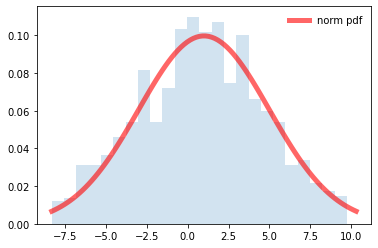

Distribution mean: 1.0
Distribution variance: 16.0
Sample mean: 0.8830094209507299
Sample variance: 16.304227518974372


In [3]:
#1. Normal
#This one I'll do for you :-)

rv_norm = norm(loc = 1, scale = 4)
x = np.linspace(rv_norm.ppf(0.01), rv_norm.ppf(0.99), 100)
fig, ax = plt.subplots(1, 1)
ax.plot(x, rv_norm.pdf(x), 'r-', lw=5, alpha=0.6, label='norm pdf')
r = rv_norm.rvs(size=1000)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2, bins = x[::4])


ax.legend(loc='best', frameon=False)
plt.show()

print("Distribution mean: {0}".format(rv_norm.stats(moments='m')))
print("Distribution variance: {0}".format(rv_norm.stats(moments='v')))
print("Sample mean: {0}".format(np.mean(r)))
print("Sample variance: {0}".format(np.var(r)))

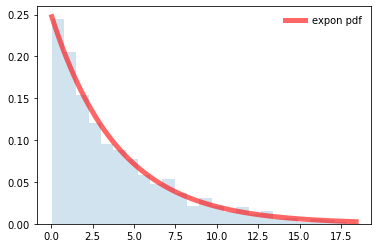

Distribution mean: 4.0
Distribution variance: 16.0
Sample mean: 3.851820487732892
Sample variance: 13.799246827576324


In [36]:
#Exponential
#here goes your code
expon_dist = expon(scale=4)
x = np.linspace(expon_dist.ppf(0.01), expon_dist.ppf(0.99), 100)
fig, ax = plt.subplots(1, 1)
ax.plot(x, expon.pdf(x, scale=4), 'r-', lw=5, alpha=0.6, label='expon pdf')
r = expon.rvs(size=1000, scale=4)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2, bins = x[::4])


ax.legend(loc='best', frameon=False)
plt.show()

print("Distribution mean: {0}".format(expon.stats(moments='m', scale=4)))
print("Distribution variance: {0}".format(expon.stats(moments='v', scale=4)))
print("Sample mean: {0}".format(np.mean(r)))
print("Sample variance: {0}".format(np.var(r)))


#hint: expon

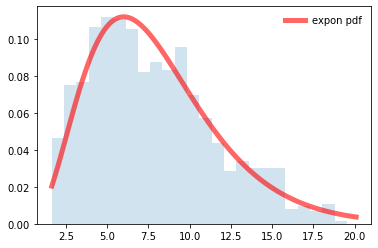

Distribution mean: 8.0
Distribution variance: 16.0
Sample mean: 7.942993011198978
Sample variance: 17.122692800539856


In [20]:
#chi2
#here goes your code

chi2_dist = chi2(df=8)
x = np.linspace(chi2_dist.ppf(0.01), chi2_dist.ppf(0.99), 100)
fig, ax = plt.subplots(1, 1)
ax.plot(x, chi2.pdf(x, df=8), 'r-', lw=5, alpha=0.6, label='chi pdf')
r = chi2.rvs(size=1000, df=8)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2, bins = x[::4])


ax.legend(loc='best', frameon=False)
plt.show()

print("Distribution mean: {0}".format(chi2.stats(moments='m', df=8)))
print("Distribution variance: {0}".format(chi2.stats(moments='v', df=8)))
print("Sample mean: {0}".format(np.mean(r)))
print("Sample variance: {0}".format(np.var(r)))





#hint: chi2

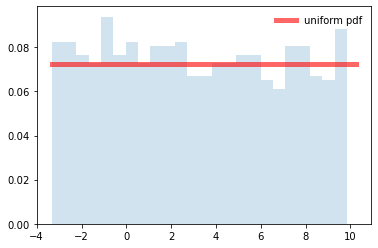

Distribution mean: 3.4641016151377544
Distribution variance: 15.999999999999998
Sample mean: 3.3027134204283097
Sample variance: 16.340171196689212


In [31]:
#uniform

#here goes your code

uni_dist = uniform(loc=-2*(3**0.5), scale=8*(3**0.5))
x = np.linspace(uni_dist.ppf(0.01), uni_dist.ppf(0.99), 100)
fig, ax = plt.subplots(1, 1)
ax.plot(x, uniform.pdf(x, loc=-2*(3**0.5), scale=8*(3**0.5)), 'r-', lw=5, alpha=0.6, label='uniform pdf')
r = uniform.rvs(loc=-2*(3**0.5), scale=8*(3**0.5), size=1000)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2, bins = x[::4])


ax.legend(loc='best', frameon=False)
plt.show()

print("Distribution mean: {0}".format(uniform.stats(moments='m', loc=-2*(3**0.5), scale=8*(3**0.5))))
print("Distribution variance: {0}".format(uniform.stats(moments='v', loc=-2*(3**0.5), scale=8*(3**0.5))))
print("Sample mean: {0}".format(np.mean(r)))
print("Sample variance: {0}".format(np.var(r)))
#hint: uniform

# Low of large numbers. Central Limit Theorem.
## Ex 2.
a) For N from 2 to 1000 draw N samples from distributions defined in Ex 1. Plot sample variance and mean against the size of the sample. 

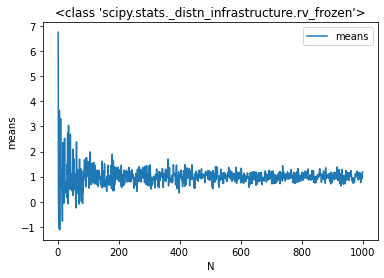

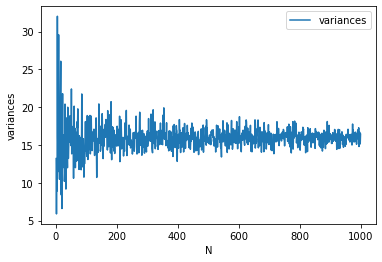

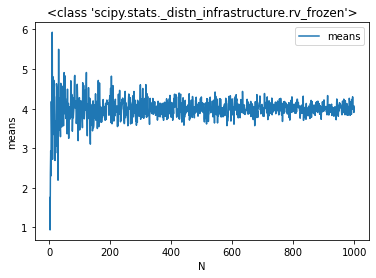

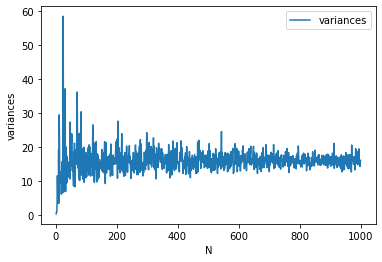

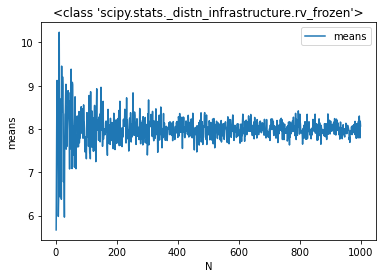

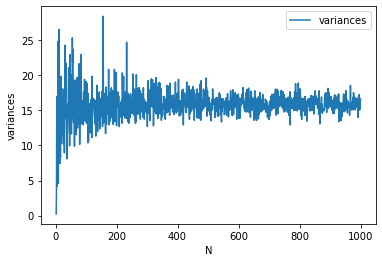

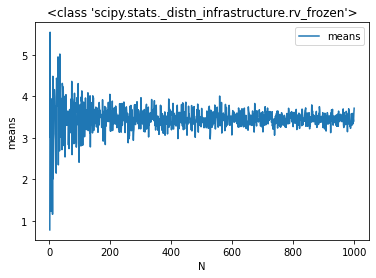

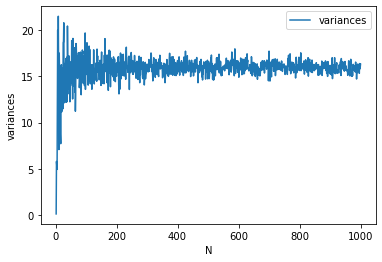

In [45]:
#here goes your code
for distribution in [rv_norm, expon_dist, chi2_dist, uni_dist]:
    X = range(2, 1001)
    means, variances = [], []
    for N in range(2, 1001):
        r = distribution.rvs(size=N)
        means.append(np.mean(r))
        variances.append(np.var(r))
    plt.title(distribution.__class__)
    plt.xlabel('N')
    plt.ylabel('means')
    plt.plot(X, means, label='means')
    plt.legend()
    plt.show()
    
    plt.xlabel('N')
    plt.ylabel('variances')
    plt.plot(X, variances, label='variances')
    plt.legend()
    plt.show()
#hint: uniform
        
    



## Ex 3.
For N=1,4,9,16 draw histograms of an average over N samples taken from distributions defined in Ex 1. 

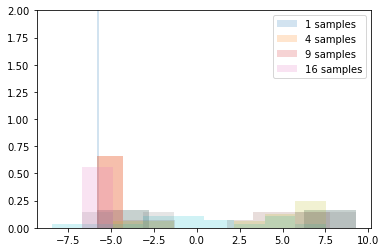

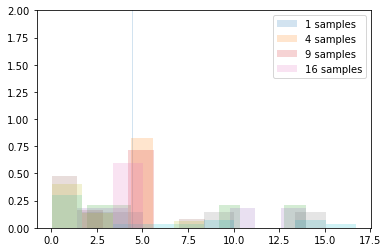

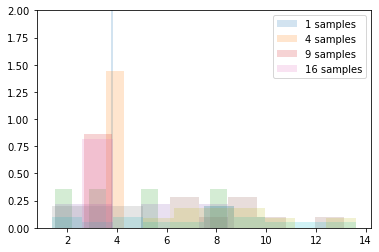

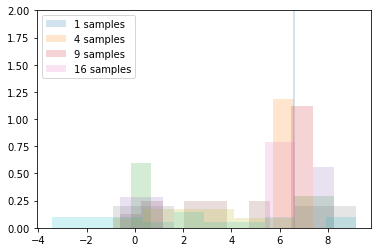

In [56]:
#here goes your code
X, y = [i**2 for i in range(1, 5)], []
means = []
for distribution in [rv_norm, expon_dist, chi2_dist, uni_dist]:
    for N in X:
        r = distribution.rvs(size=N)
        means.append(r)
        plt.hist(means, label=f'{N} samples', density=True, histtype='stepfilled', alpha=0.2)
        plt.legend()
    plt.ylim((0, 2))
    plt.show()
    means = []


# Arbitrary distribution sampling

Sometimes it may happen, that we need to sample from a custom distribution, not implemented in any standard library. There exist a simple algorithm for such sampling, provided that the distribution is bounded (pdf has finite support and maximum).


#### Accept-rejection sampling
Let the distribution be given by the pdf $g(x)$ and defined at interval $[a,b]$. In addition, let $M$ be the supremum of $g(x)$.

1. Take a sample $t$ from the uniform distribution at the interval $[a,b]$,
2. Take a sample $u$ from the uniform distribution at the interval $[0,M]$,
3. If $g(t) > u$ we accept $t$ as a sample taken from the original distribution. If not, we go back to 1.

## Ex 4. 
Implement function accept_rejection_sampling(dist, size = 1) which samples from any bounded distribution on the [0,1] interval.

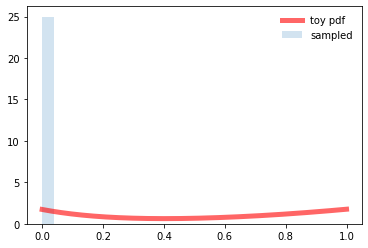

In [69]:
def toy_dist(x):
    C = 1/3 - np.exp(-4)/4 + 1/4
    return (x**2 + np.exp(-4*x)) / C 

x = np.linspace(0,1,1000)

def accept_rejection_sampling(dist, size = 1):
    #here goes your code
    samples = []
    M = np.max(dist)
    t_dist = uniform(loc=0, scale=len(dist)-1)
    u_dist = uniform(loc=0, scale=M)
    while len(samples) < size:
        t = int(uni_dist.rvs(1)[0])
        u = uni_dist.rvs(1)[0]
        if dist[t] > u:
            samples.append(t)
    return samples
        
    



samples = accept_rejection_sampling(toy_dist(x), size = 10000)

fig, ax = plt.subplots(1, 1)
ax.plot(x, toy_dist(x), 'r-', lw=5, alpha=0.6, label='toy pdf')
ax.hist(samples, density=True, histtype='stepfilled', alpha=0.2, bins = x[::40], label = "sampled")
ax.legend(loc='best', frameon=False)
plt.show()

# Probability space matters!
## Ex 5
Sample 2000 points from the unit disk. Do it in following ways:
1. Assume uniform distribution of radius (0,1) and argument (0,2$\pi$),  
2. Assume uniform distribution of x and y coordinate (-1,1). Drop values laying outside of the disk.   
Explain differences. between 1. and 2. Then:
3. Modify the solution of point 1. by changing the distribution of the radius in such a way, that we result in 2D distribution from 2.

Version 1


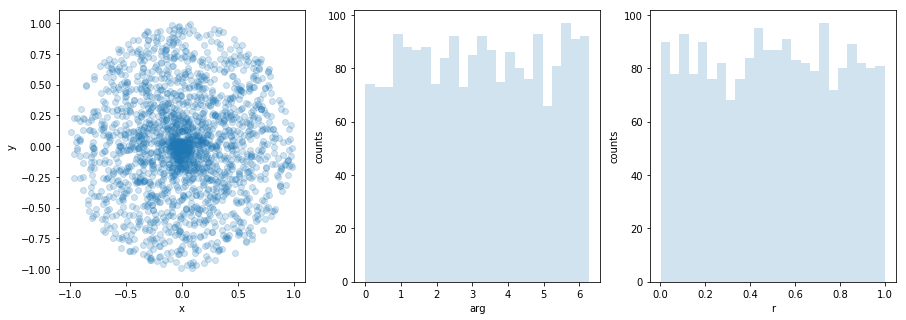

Version 2


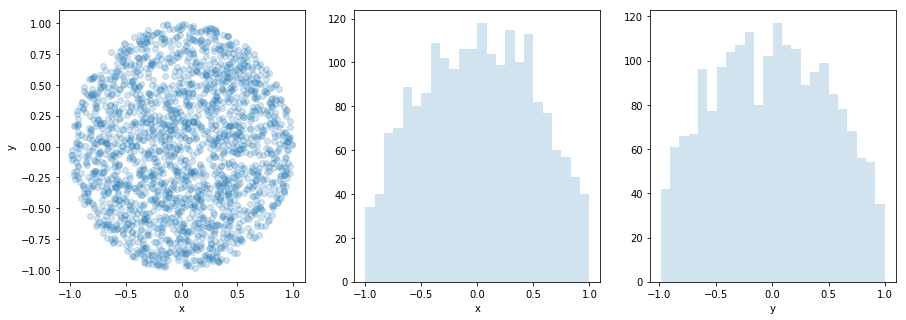

In [9]:
#Version1
#here goes your code


#Version2
#here goes your code

Here goes your explanation




Version 3


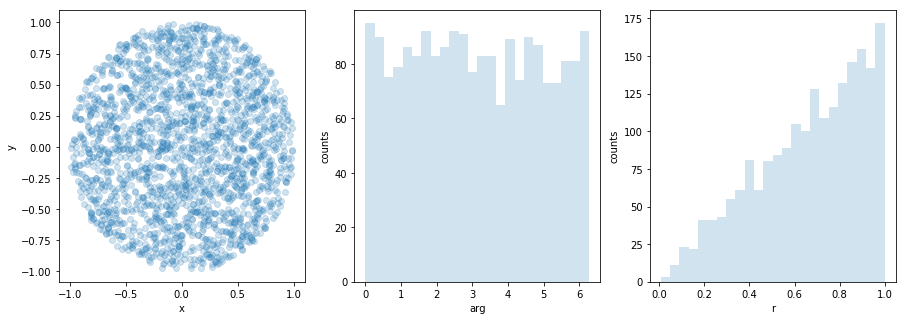

In [10]:
#Version3
#here goes your code


## Application: Laplace equation, Dirichlet boundary conditions

#### Monte-Carlo procedure for solving 2D Laplace equation with Dirichlet boundary conditions
1. Start in a random position inside the boundaries,
2. With an equal probability move up/down/right/left until you hit the boundary,
3. After hitting the boundary we take the value $v_{b}$ of the function in the hitting point. We update the values of all points along the just finished random walk using the formula:
$$ v_{new} = \dfrac{nv_{old} + v_{b}}{n+1}, $$
where $n$ is a number of random walks which have already passed through this point.
4. Finish if the desired precision is achieved. If not, go back to 1.


A theory behind the above procedure can be found here:
https://www.uzh.ch/cmsssl/physik/dam/jcr:d559688c-1e7f-44ca-9fbe-aab0755c0b6e/empp18_MC_Markov.pdf

## Ex 6
Implement the method described above and solve numerically given Dirichlet problem. Plot few intermediate steps.

In [11]:
S = 100 # Decrease if computations take too long
plane = np.zeros((S,S))
plane_counts = np.zeros((S,S))
plane[0] = np.cos(np.linspace(-1.5,1.5,S)*2*np.pi)
plane[-1] = -np.cos(np.linspace(-1,1,S)*2*np.pi)
plane[:,0] = np.cos(np.linspace(-0.5,0.5,S)*2*np.pi)
plane[:,-1] = -2+np.linspace(-1,1,S)**2

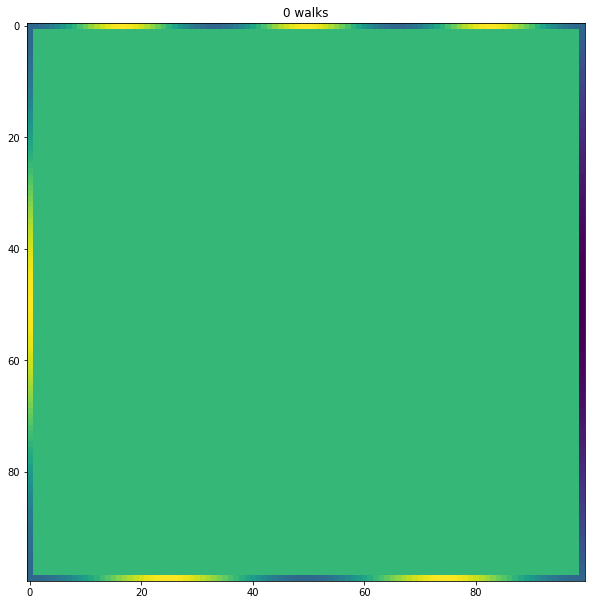

In [12]:
plt.figure(figsize=(10,15))
plt.title("0 walks")
plt.imshow(plane)

In [13]:
#here goes your code

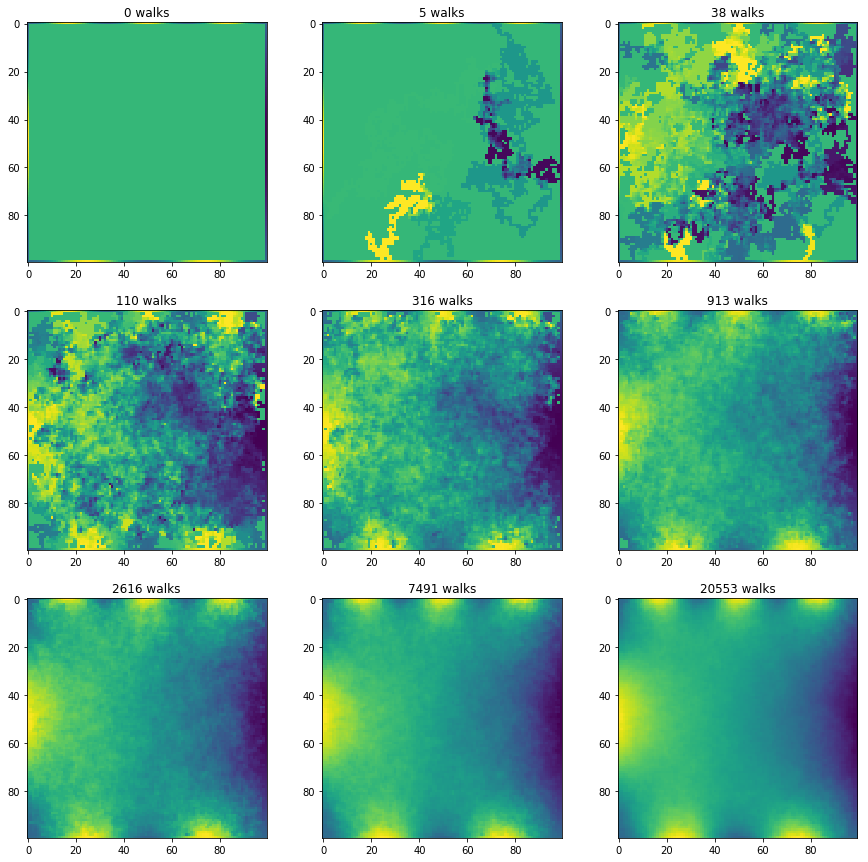

In [16]:
#Animation code for testing purposes. May not work on your machine.


%matplotlib qt

import matplotlib.animation as animation 

fig = plt.figure()
plt.title("0 walks")
im = plt.imshow(planes[0])
im.set_array(planes[0])

# function to update figure
def updatefig(j):
    # set the data in the axesimage object
    im.set_array(planes[j])
    plt.title("{0} walks".format(walks[j]))
    return [im]
# kick off the animation
ani = animation.FuncAnimation(fig, updatefig, frames=range(1000), interval=1000)
plt.show()